# Tarea 4

Se importan las librerias necesarias y se cargan los datos del archivo "interferometria.rad"

In [629]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.stats import sigma_clip

In [630]:
data = np.genfromtxt('interferometria.rad', comments='*', dtype='str')

In [631]:
Temp  = np.array(data[:,9:], dtype='float')
Hrs   = np.array(data[:,0], dtype='str')
Coord = np.array(data[:,1:3],dtype='float')

# Pasamos a radianes
Coord[:,0] = Coord[:,0]*np.pi/180
Coord[:,1] = Coord[:,1]*np.pi/180

Promediamos los canales:

In [632]:
Temp_mean = np.zeros(len(Temp))

for i in range(len(Temp_mean)):
    Temp_mean[i] = np.mean(Temp[i,:])
    
# creamos pandas

data = pd.DataFrame()
data['hrs']     = Hrs 
data['coord_a'] = Coord[:,0]
data['coord_e'] = Coord[:,1]
data['temp']    = Temp_mean

Graficamos

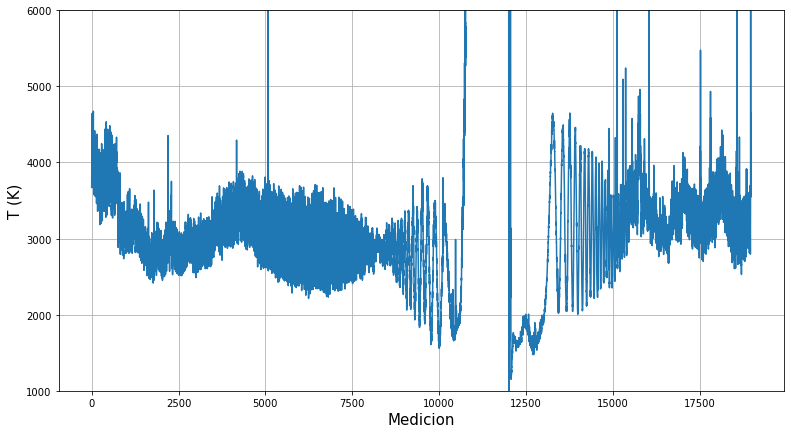

In [633]:
plt.figure(figsize=(13,7))
plt.plot(np.array(data.index), data['temp'])
plt.ylim(1000,6000)
plt.xlabel('Medicion', size=15)
plt.ylabel('T (K)', size=15)
plt.grid()
plt.show()

Separamos los datos de mañana y tarde:

In [634]:
data_m = data[11497:].reset_index()
data_t = data[:11497].reset_index()

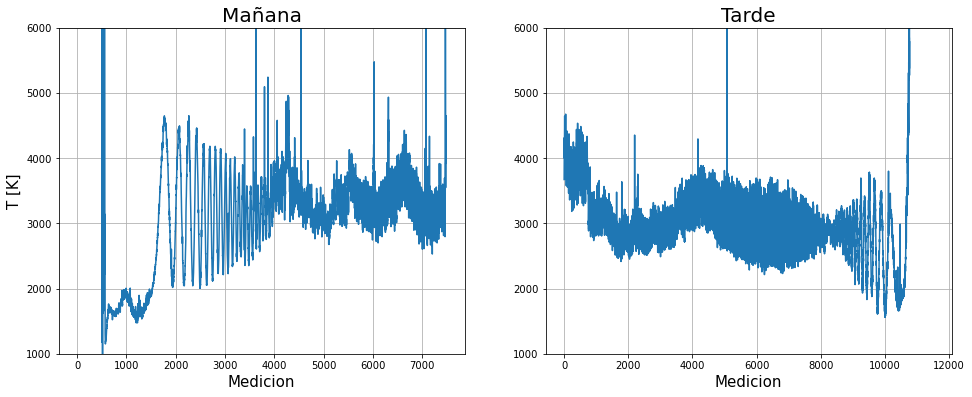

In [635]:
# SIN FILTRAR
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(16,6))

# grafico mañana
ax[0].set_title('Mañana', size=20)
ax[0].plot(np.array(data_m.index),data_m['temp'])
ax[0].set_xlabel('Medicion', size=15)
ax[0].set_ylabel('T [K]', size=15)
ax[0].set_ylim(1000,6000)
ax[0].grid()

# grafico tarde
ax[1].set_title('Tarde', size=20)
ax[1].plot(np.array(data_t.index),data_t['temp'])
ax[1].set_xlabel('Medicion', size=15)
ax[1].grid()
ax[1].tick_params(labelleft=True)

Por inspeccion se puede notar que los datos que corresponden a muy temprano al amanecer y muy tarde al atardecer tienen ruido, por lo que se eliminan los datos

In [636]:
data_m = data_m[2000:]
data_t = data_t[:10000]

Luego, todos los datos que esten alejados mas de 0.5 veces el RMS del RMS se filtran

In [637]:
rms_m = np.sqrt(np.mean(data_m['temp']**2))
rms_t = np.sqrt(np.mean(data_t['temp']**2))

data_m = data_m[abs(data_m['temp']-rms_m)<=0.5*rms_m]
data_t = data_t[abs(data_t['temp']-rms_t)<=0.5*rms_t]

Se obtienen las temperaturas para la mañana y tarde ya filtradas

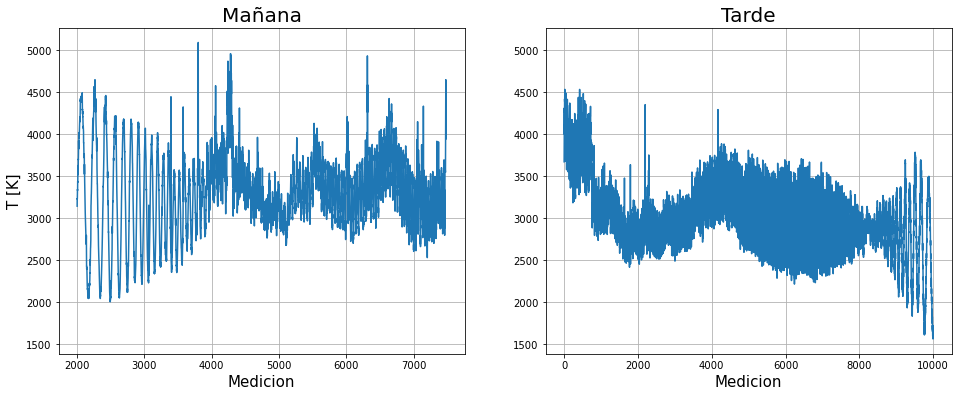

In [638]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(16,6))

# grafico mañana
ax[0].set_title('Mañana', size=20)
ax[0].plot(np.array(data_m.index),data_m['temp'])
ax[0].set_xlabel('Medicion', size=15)
ax[0].set_ylabel('T [K]', size=15)
ax[0].grid()

# grafico tarde
ax[1].set_title('Tarde', size=20)
ax[1].plot(np.array(data_t.index),data_t['temp'])
ax[1].set_xlabel('Medicion', size=15)
ax[1].grid()
ax[1].tick_params(labelleft=True)

A continuacion se filtran las frecuencias del espectro en el espacio de Fourier.

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


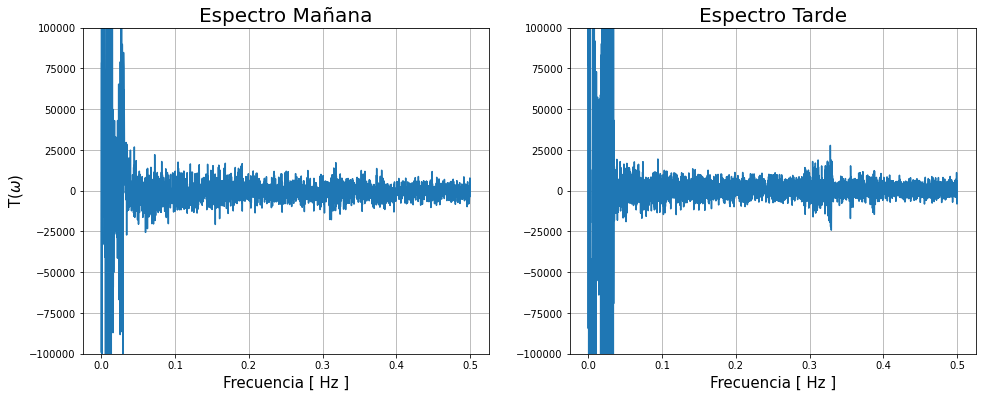

In [639]:
#mañana
esp_m=np.fft.rfft(data_m['temp'])
f_m=np.fft.rfftfreq(len(data_m.index))

#tarde
esp_t=np.fft.rfft(data_t['temp'])
f_t=np.fft.rfftfreq(len(data_t.index))

fig, ax = plt.subplots(1, 2, sharey=True, figsize=(16,6))
# grafico mañana
ax[0].set_title('Espectro Mañana', size=20)
ax[0].plot(f_m,esp_m)
ax[0].set_xlabel('Frecuencia [ Hz ]', size=15)
ax[0].set_ylabel('T($\omega$)', size=15)
ax[0].set_ylim(-100000,100000)
ax[0].grid()

# grafico tarde
ax[1].set_title('Espectro Tarde', size=20)
ax[1].plot(f_t,esp_t)
ax[1].set_xlabel('Frecuencia [ Hz ]', size=15)
ax[1].grid()
ax[1].tick_params(labelleft=True)

In [640]:
# Eliminamos frecuencias bajas y altas
for i in range(len(f_t)):
    if f_t[i]<0.003:
        esp_t[i] = 0
    if f_t[i]>0.04:
        esp_t[i] = 0
        
for i in range(len(f_m)):
    if f_m[i]<0.003:
        esp_m[i] = 0
    if f_m[i]>0.04:
        esp_m[i] = 0

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(0.0, 0.05)

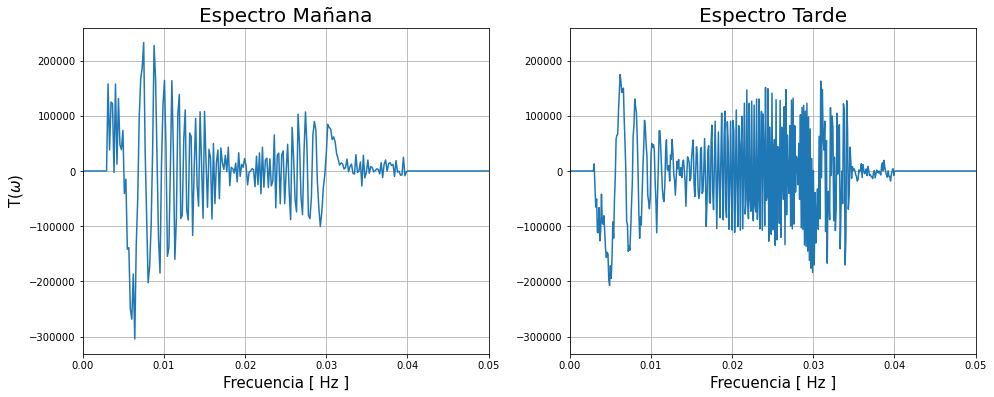

In [641]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(16,6))
# grafico mañana
ax[0].set_title('Espectro Mañana', size=20)
ax[0].plot(f_m,esp_m)
ax[0].set_xlabel('Frecuencia [ Hz ]', size=15)
ax[0].set_ylabel('T($\omega$)', size=15)
ax[0].set_xlim(0,0.05)
ax[0].grid()

# grafico tarde
ax[1].set_title('Espectro Tarde', size=20)
ax[1].plot(f_t,esp_t)
ax[1].set_xlabel('Frecuencia [ Hz ]', size=15)
ax[1].grid()
ax[1].tick_params(labelleft=True)
ax[1].set_xlim(0,0.05)

Se vuelve al espacio de temperaturas con la anti-transformada

In [642]:
data_m['temp'] = np.fft.irfft(esp_m)
data_t = data_t[1:]
data_t['temp'] = np.fft.irfft(esp_t)

Se grafican las temperaturas:

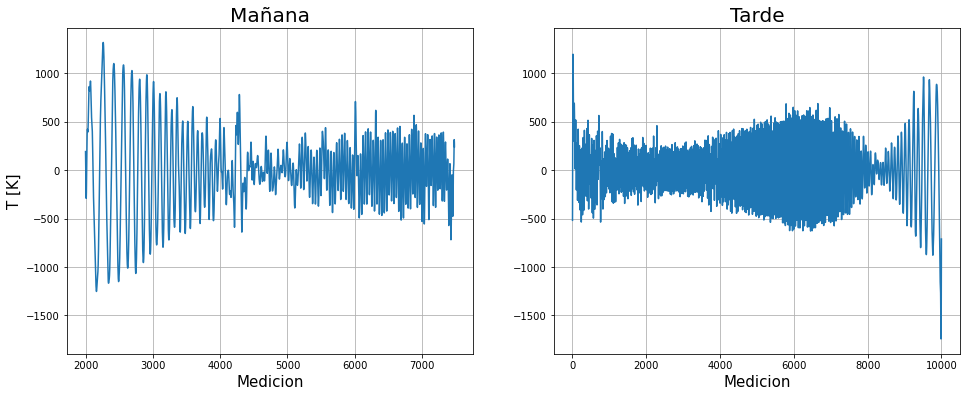

In [643]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(16,6))
# grafico mañana
ax[0].set_title('Mañana', size=20)
ax[0].plot(np.array(data_m.index),data_m['temp'])
ax[0].set_xlabel('Medicion', size=15)
ax[0].set_ylabel('T [K]', size=15)
ax[0].grid()

# grafico tarde
ax[1].set_title('Tarde', size=20)
ax[1].plot(np.array(data_t.index),data_t['temp'])
ax[1].set_xlabel('Medicion', size=15)
ax[1].grid()
ax[1].tick_params(labelleft=True)

## Calculo de las aperturas

In [644]:
alfa = (85.2*np.pi/180)
data_t['ap'] = (37.85/0.21) * np.sqrt(1-(np.cos(data_t['coord_a']-alfa)**2)*(np.cos(data_t['coord_e'])**2))
data_m['ap'] = (37.85/0.21) * np.sqrt(1-(np.cos(data_m['coord_a']-alfa)**2)*(np.cos(data_m['coord_e'])**2))

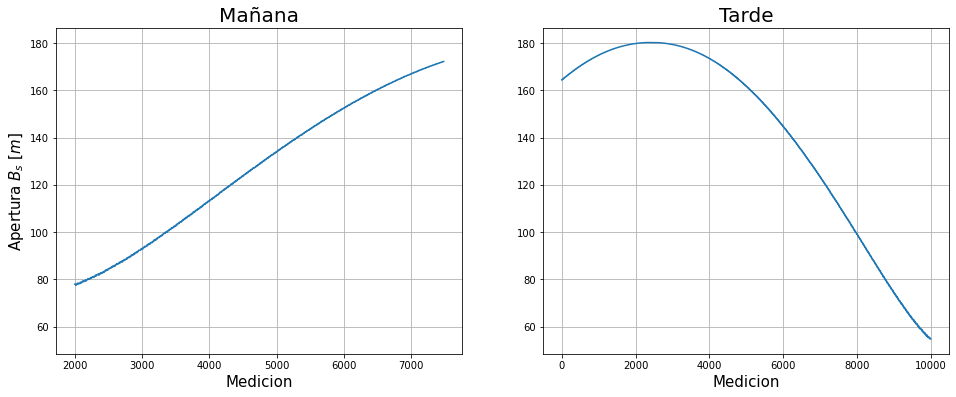

In [645]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(16,6))
# grafico mañana
ax[0].set_title('Mañana', size=20)
ax[0].plot(np.array(data_m.index),data_m['ap'])
ax[0].set_ylabel('Apertura $B_s$ [$m$]', size=15)
ax[0].set_xlabel('Medicion', size=15)
ax[0].grid()

# grafico tarde
ax[1].set_title('Tarde', size=20)
ax[1].plot(np.array(data_t.index),data_t['ap'])
ax[1].set_xlabel('Medicion', size=15)
ax[1].grid()
ax[1].tick_params(labelleft=True)

## Ajuste

In [646]:
# funcion de visibilidad
def visivilidad(Bs, d):
    a = d*np.pi/180
    return abs(np.sin(np.pi*a*Bs)/(np.pi*a*Bs))

<ipython-input-646-c8d1489273d4>:3: RuntimeWarning: invalid value encountered in true_divide
  return abs(np.sin(np.pi*a*Bs)/(np.pi*a*Bs))
<ipython-input-646-c8d1489273d4>:3: RuntimeWarning: invalid value encountered in true_divide
  return abs(np.sin(np.pi*a*Bs)/(np.pi*a*Bs))


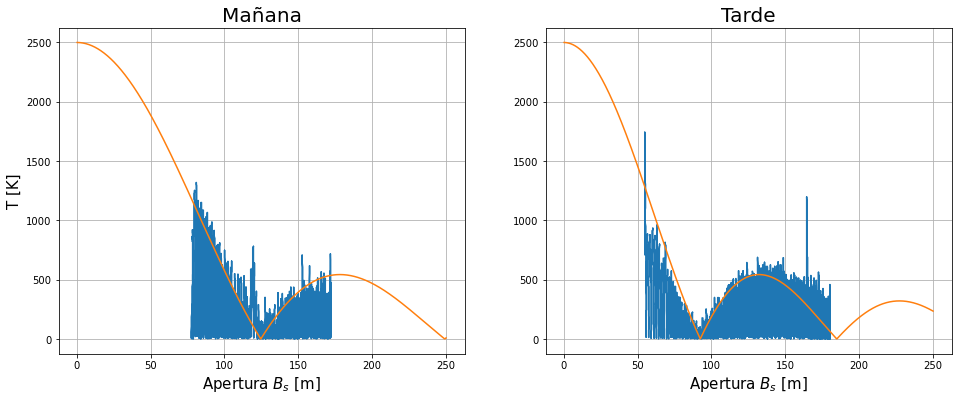

In [650]:
Bs = np.linspace(0, 250, 1000)

fig, ax = plt.subplots(1, 2, sharey=True, figsize=(16,6))
# grafico mañana
ax[0].set_title('Mañana', size=20)
ax[0].plot(data_m['ap'], abs(data_m['temp']))
ax[0].plot(Bs, 2500*visivilidad(Bs,0.46))
ax[0].set_xlabel('Apertura $B_s$ [m]', size=15)
ax[0].set_ylabel('T [K]', size=15)
ax[0].grid()

# grafico tarde
ax[1].set_title('Tarde', size=20)
ax[1].plot(data_t['ap'], abs(data_t['temp']))
ax[1].plot(Bs, 2500*visivilidad(Bs,0.62))
ax[1].set_xlabel('Apertura $B_s$ [m]', size=15)
ax[1].grid()
ax[1].tick_params(labelleft=True)